In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

from conda_forge_tick.utils import load_graph

/home/christopher/mc/lib/python3.7/site-packages/github3/session.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Callable
/home/christopher/mc/lib/python3.7/site-packages/github3/structs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class GitHubIterator(models.GitHubCore, collections.Iterator):


In [3]:
path = Path(".")
if not path.joinpath("cf-graph-countyfair").is_dir():
    !git clone https://github.com/regro/cf-graph-countyfair --depth=1
    !ln -s cf-graph-countyfair/graph.json graph.json

if not path.joinpath("cf-scripts").is_dir():
    !git clone https://github.com/regro/cf-scripts
    !ln -s cf-scripts/conda_forge_tick  conda_forge_tick

In [6]:
cd ../cf-graph-countyfair

/home/christopher/dev/conda-forge/cf-graph-countyfair


In [4]:
gx = load_graph()

In [14]:
from conda.models.version import VersionOrder

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
a = 'created_at'
b = 'closed_at'

In [14]:
import datetime

In [51]:
def get_datetime(s):
    return datetime.datetime.strptime(s,'%Y-%m-%dT%H:%M:%SZ')

In [93]:
elapsed = []
started = []

In [94]:
for k, node in gx.nodes.items():
    prs = node.get('payload', {}).get('PRed', [])
    for pr in prs: 
        if 'PR' in pr and pr['PR'].get(b):
            start = get_datetime(pr['PR'][a])
            started.append(start)
            finish = get_datetime(pr['PR'][b]) if pr['PR'][b] else datetime.datetime.utcnow()
            elapsed.append((finish-start).total_seconds())

In [124]:
df = pd.DataFrame({'elapsed': elapsed, 'started': started})
df = df.set_index('started')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38890 entries, 2018-09-14 13:13:20 to 2020-04-19 22:29:47
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   elapsed  38890 non-null  float64
dtypes: float64(1)
memory usage: 607.7 KB


In [125]:
date_ranges = [str(x) for x in pd.date_range(np.min(started), np.max(started), freq='M')]

In [182]:
medians = []
less_1_month = []

In [183]:
hour = 1
day = 24

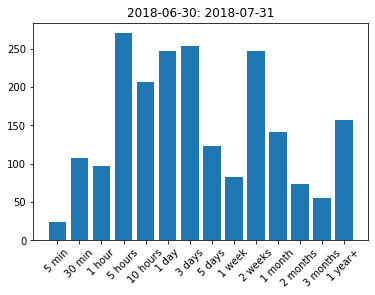

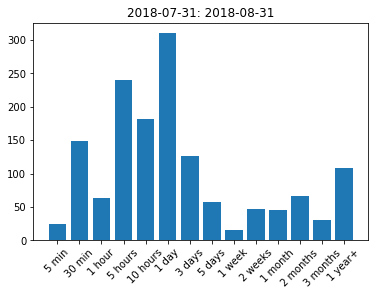

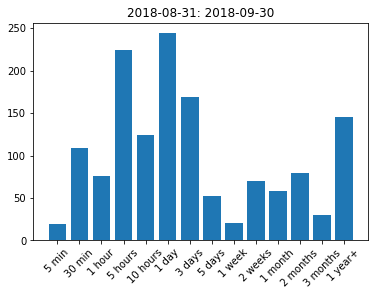

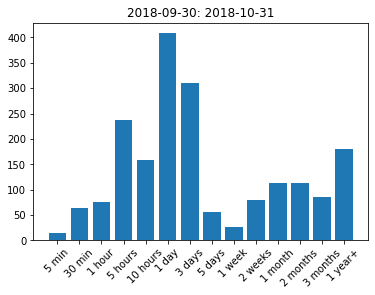

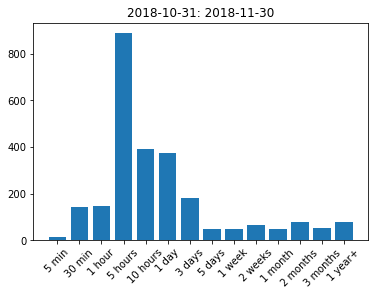

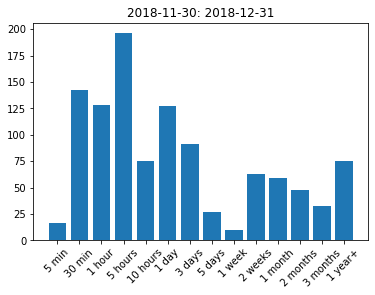

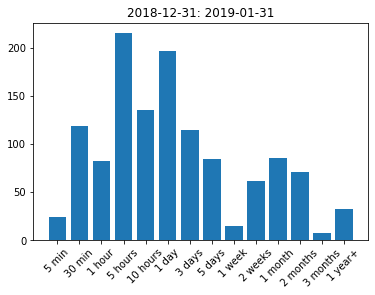

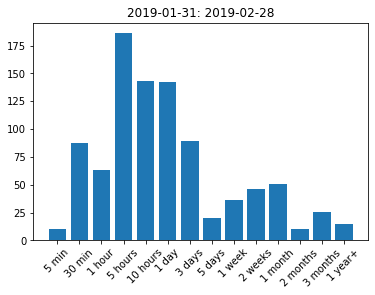

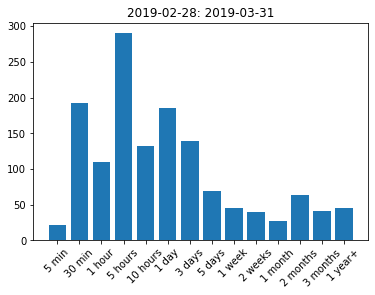

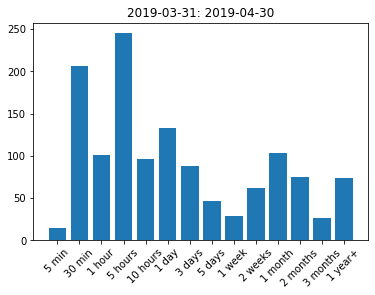

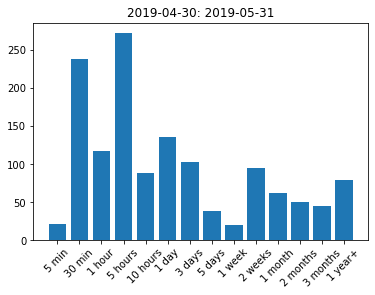

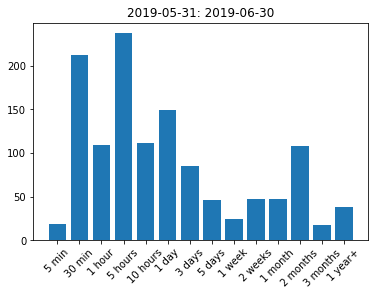

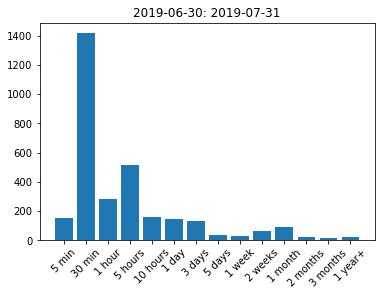

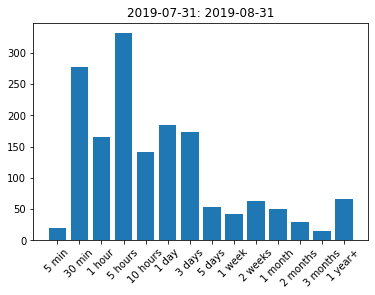

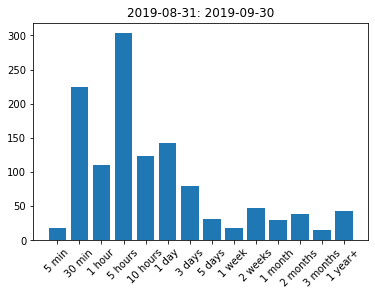

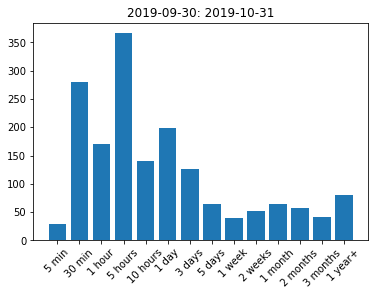

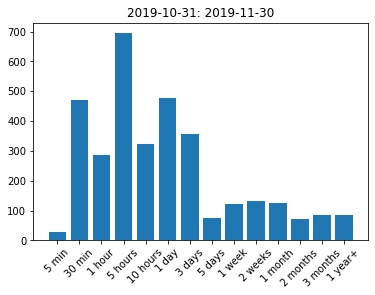

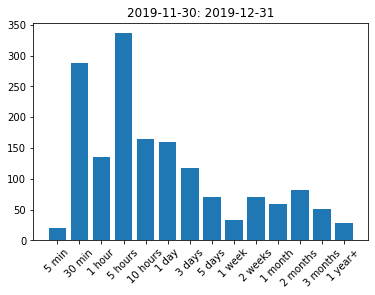

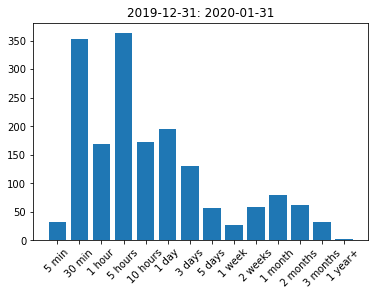

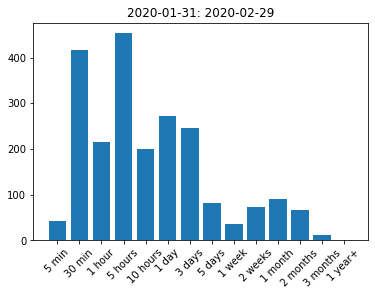

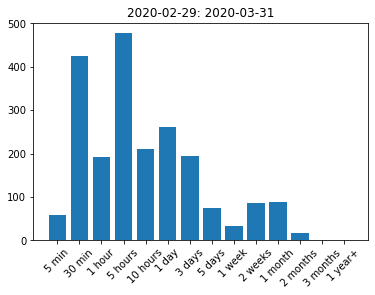

In [184]:
for i, (b, e) in enumerate(zip(date_ranges, date_ranges[1:])):
    
    nelapsed = df[b:e]['elapsed']/(60*60)
    medians.append(np.median(nelapsed))
    less_1_month.append(np.sum(nelapsed < 30*day) / len(nelapsed))
    vals, _= np.histogram(nelapsed, [0, 5/60, 30/60, hour, 5*hour, 10*hour, day, 3*day, 5*day, 7*day, 14*day, 30*day, 60*day, 90*day, 365*day])
    plt.axes(label=i)
    plt.bar(range(len(vals)), vals, tick_label=['5 min', '30 min', '1 hour', '5 hours', '10 hours', '1 day', '3 days', '5 days', '1 week', '2 weeks', '1 month', '2 months', '3 months', '1 year+'], )
    plt.xticks(rotation=45)
    plt.title(f'{b.split(" ")[0]}: {e.split(" ")[0]}')
    plt.show()

In [162]:
vals, _= np.histogram(np.asarray(elapsed)/60/60, [0, 5/60, 30/60, hour, 5*hour, 10*hour, day, 3*day, 5*day, 7*day, 14*day, 30*day, 60*day, 90*day, 365*day])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

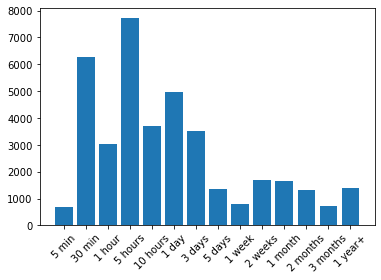

In [163]:
plt.bar(range(len(vals)), vals, tick_label=['5 min', '30 min', '1 hour', '5 hours', '10 hours', '1 day', '3 days', '5 days', '1 week', '2 weeks', '1 month', '2 months', '3 months', '1 year+'], )
plt.xticks(rotation=45)